In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 # You can also use PIL as alternative.
from google.colab.patches import cv2_imshow

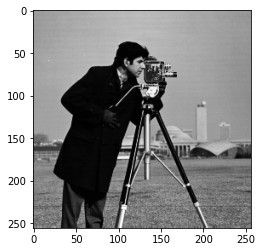

In [ ]:
image = cv2.imread("/content/cameraman.png", 0)
plt.imshow(image, cmap="gray") # If we use cv2_imshow then we can just write cv2_imshow(image), for plt you need to explicitly mention cmap = "gray"

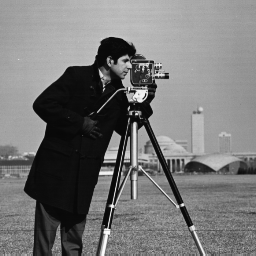

In [ ]:
cv2_imshow(image)

# Negative Image

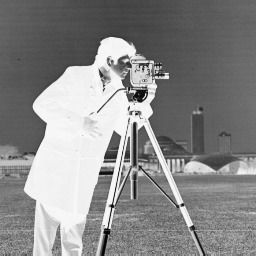

In [ ]:
new_image = 255 - image
cv2_imshow(new_image)

# Gray Image

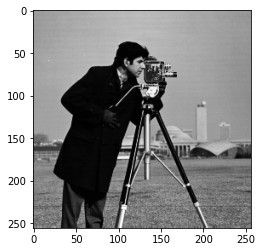

In [ ]:
plt.imshow(image, cmap="gray") # If we use cv2_imshow then we can just write cv2_imshow(image), for plt you need to explicitly mention cmap = "gray"

In [ ]:
threshold = int(input("Enter the Threshold : "))

Enter the Threshold : 150


In [ ]:
print(image)
image.shape

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


(256, 256)

In [ ]:
# threshold_image = np.zeros((256, 256), dtype=int)
# for i in image:
  
#   for j in i:
#     threshold_image[i][j] = np.where(j > threshold, 250, 0)

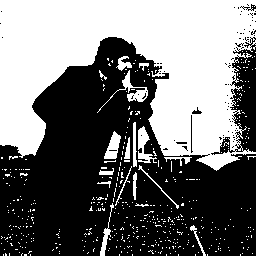

In [ ]:
threshold_image = []
for i in range(len(image)):
  temp = []
  for j in range(len(image)):
    if image[i][j] > threshold: # Threshold entered above is 150
      temp.append(255)
    else:
      temp.append(0)
  threshold_image.append(temp)

threshold_image = np.array(threshold_image)
cv2_imshow(threshold_image)

# Thresholding without Background

Enter the Lower Limit : 100
Enter the Upper Limit : 200


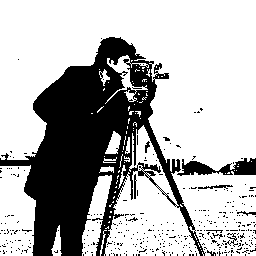

In [ ]:
threshold_image = []
a = int(input("Enter the Lower Limit : "))
b = int(input("Enter the Upper Limit : "))
for i in range(len(image)):
  temp = []
  for j in range(len(image)):
    if image[i][j] > a and image[i][j] < b:
      temp.append(255)
    else:
      temp.append(0)
  threshold_image.append(temp)

threshold_image = np.array(threshold_image)
cv2_imshow(threshold_image)

# Thresholding with Background

Enter the Lower Limit : 100
Enter the Upper Limit : 200


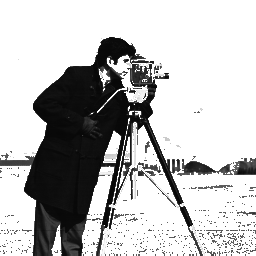

In [ ]:
threshold_image = []
a = int(input("Enter the Lower Limit : "))
b = int(input("Enter the Upper Limit : "))
for i in range(len(image)):
  temp = []
  for j in range(len(image)):
    if image[i][j] > a and image[i][j] < b:
      temp.append(255)
    else:
      temp.append(image[i][j])
  threshold_image.append(temp)

threshold_image = np.array(threshold_image)
cv2_imshow(threshold_image)

# Blurring the Image

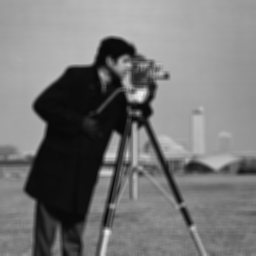

In [ ]:
blured_image = cv2.blur(image, (5, 5))
cv2_imshow(blured_image)

# Neighborhood processing in spatial domain:


### Here we consider the following image for Spatial Filtering:
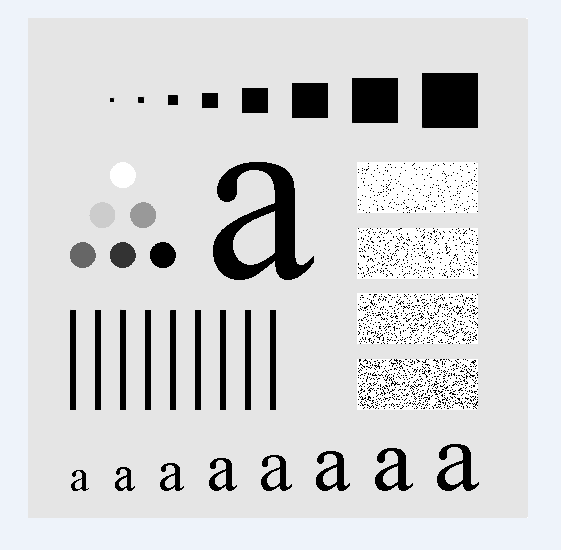

In [14]:
img = cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif", 0)
m, n = img.shape

In [13]:
# Creating the 3x3 mask which will be applied to the above image (a portion of the image).
mask = np.ones([3, 3], dtype = int)
mask = 1/9 * mask
mask

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

# Averaging/Low Pass Filtering using the Formula:



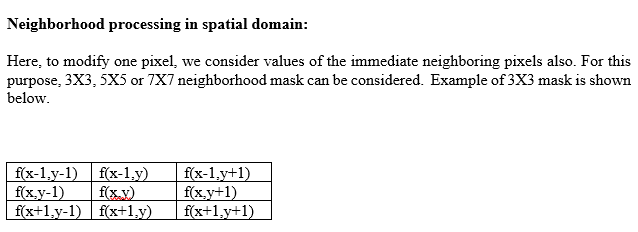

In [17]:
# Averaging/Low Pass Filtering using the Formula:
img_new = img.copy()
for i in range(1, m - 1):
  for j in range(1, n - 1):


    temp = img[i - 1, j - 1] * mask[0, 0] + img[i - 1, j] * mask[0, 1] + img[i - 1, j + 1] * mask[0, 2] + \
    img[i, j - 1] * mask[1, 0] + img[i, j] * mask[1, 1] + img[i, j + 1] * mask[1, 2] + \
    img[i + 1, j - 1] * mask[2, 0] + img[i + 1, j] * mask[2, 1] + img[i + 1, j + 1] * mask[2, 2]

    img_new[i, j] = temp

    # Using List comprehension:
    # temp = [img[i - 1, j - 1] * mask[0, 0] + img[i - 1, j] * mask[0, 1] + img[i - 1, j + 1] * mask[0, 2] + \
    # img[i, j - 1] * mask[1, 0] + img[i, j] * mask[1, 1] + img[i, j + 1] * mask[1, 2] + \
    # img[i + 1, j - 1] * mask[2, 0] + img[i + 1, j] * mask[2, 1] + img[i + 1, j + 1] * mask[2, 2] for i in range(1, m - 1) for j in range(1, n - 1)]

    
cv2.imwrite('Blurred.png', img_new) # Storing the file in colab in PNG format.

True

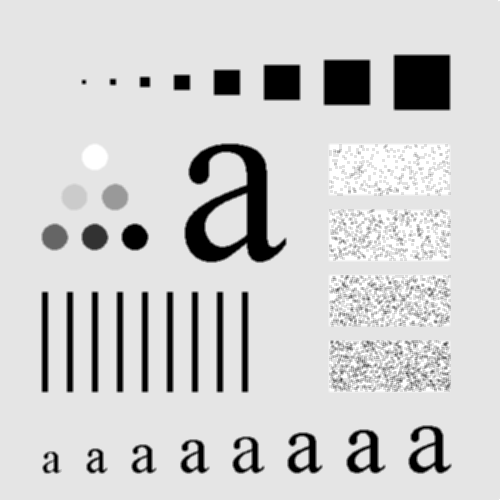

In [18]:
cv2_imshow(img_new) # We notice the original image has been blurred after applying LPF.

# Averaging/Low Pass Filtering without using the Formula:

We used a 3x3 mask in the previous step and wrote the explicitly iterated 

1.   We used a 3x3 mask in the previous step and wrote the explicitly iterated 
 through pixel values in the image and multiplied them with mask values which proved to be tedious while coding (9 mulitplication expressions).
2.   While using masks of greater size (5x5, 7x7, etc.), this would prove to be more difficult while also being an inefficient way of programming and evaluating.
3. Hence we use given method:




In [32]:
# Averaging/Low Pass Filtering without using the Formula:
size_of_mask = int(input("Enter the size of the Mask : "))
img_new = img.copy()
m, n = img.shape
print("You have requested for ", size_of_mask ,"x", size_of_mask)
a = size_of_mask//2

for i in range(a, m - a):
  for j in range(a, n - a):
    temp = np.sum(img[i - a:i + a + 1, j - a:j + a + 1])
    img_new[i, j] = temp//size_of_mask**2

Enter the size of the Mask : 3
You have requested for  3 x 3


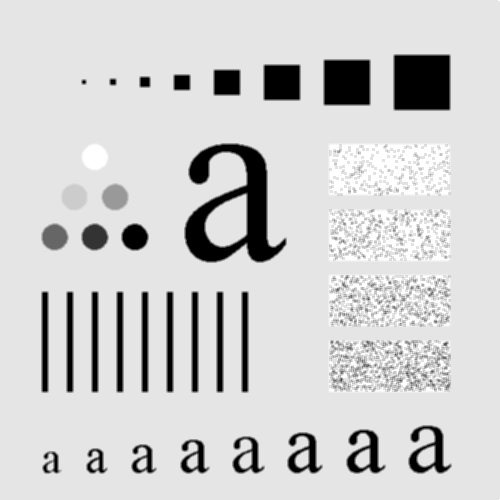

In [33]:
cv2_imshow(img_new)

Enter the size of the Mask : 3
You have requested for Mask of Size :   3 x 3
Enter the size of the Mask : 15
You have requested for Mask of Size :   15 x 15
Enter the size of the Mask : 45
You have requested for Mask of Size :   45 x 45
Enter the size of the Mask : 65
You have requested for Mask of Size :   65 x 65


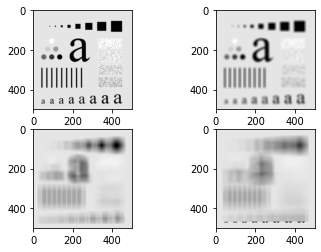

In [39]:
# For different sizes of masks provided from user:
for x in range(1, 5):
  # Averaging/Low Pass Filtering without using the Formula:
  size_of_mask = int(input("Enter the size of the Mask : "))
  img_new = img.copy()
  m, n = img.shape
  print("You have requested for Mask of Size :  ", size_of_mask ,"x", size_of_mask)
  a = size_of_mask//2

  for i in range(a, m - a):
    for j in range(a, n - a):
      temp = np.sum(img[i - a:i + a + 1, j - a:j + a + 1])
      img_new[i, j] = temp//size_of_mask**2
  plt.subplot(2, 2, x)
  plt.imshow(img_new, cmap = "gray")

# Median Filtering

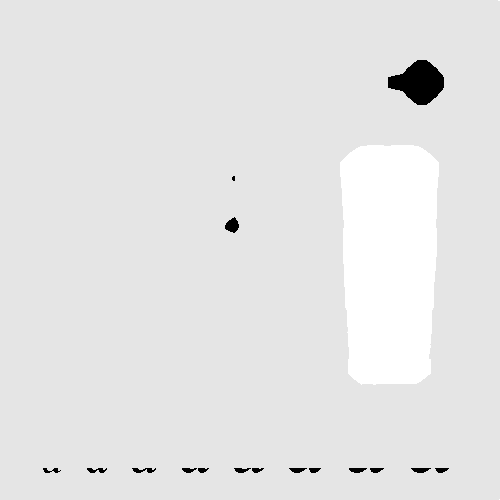

In [42]:
# Median Filtering

# Averaging/Low Pass Filtering without using the Formula:

img_new = img.copy()
m, n = img.shape

for i in range(a, m - a):
  for j in range(a, n - a):
    temp = img[i - a:i + a + 1, j - a:j + a + 1]
    img_new[i, j] = np.median(temp)

cv2_imshow(img_new)

# Gaussian Noise

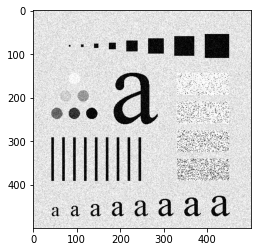

In [48]:
from skimage.util import random_noise
gn_img = cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif", 0)
noise_img = random_noise(img, mode='gaussian', seed = None, clip = True)
plt.imshow(noise_img, cmap = "gray")

Enter the size of the Mask : 3
You have requested for Mask of Size :   3 x 3
Enter the size of the Mask : 5
You have requested for Mask of Size :   5 x 5
Enter the size of the Mask : 7
You have requested for Mask of Size :   7 x 7
Enter the size of the Mask : 9
You have requested for Mask of Size :   9 x 9


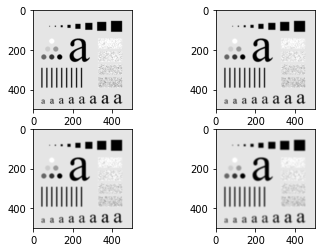

In [51]:
# For different sizes of masks provided from user:
for x in range(1, 5):
  # Averaging/Low Pass Filtering without using the Formula:
  size_of_mask = int(input("Enter the size of the Mask : "))
  img_new = gn_img.copy()
  m, n = img.shape
  print("You have requested for Mask of Size :  ", size_of_mask ,"x", size_of_mask)
  a = size_of_mask//2

  for i in range(a, m - a):
    for j in range(a, n - a):
      temp = np.sum(gn_img[i - a:i + a + 1, j - a:j + a + 1])
      img_new[i, j] = temp//size_of_mask**2
  plt.subplot(2, 2, x)
  plt.imshow(img_new, cmap = "gray")

# Conclusion:
From the experiment performed above, I learnt the following:



1.   Concept of image enhancement in spatial domain using point processing  and neighbourhood processing methods
2.   Performing various operations using given images (obtaining negatives of images, gray level slicing with and without background, etc.)

